In [15]:
import random
import pandas as pd

# Load the full datasets
courses = pd.read_csv("courses.csv").to_dict(orient="records")
lecturers = pd.read_csv("lecturers.csv").to_dict(orient="records")
rooms = pd.read_csv("rooms.csv").to_dict(orient="records")
students = pd.read_csv("students.csv").to_dict(orient="records")
timeslots = pd.read_csv("timeslots.csv").to_dict(orient="records")

# === Generate a chromosome ===
def generate_chromosome(courses, rooms, timeslots, students, lecturers):
    chromosome = []
    for course in courses:
        # Select a random room
        room = random.choice(rooms)
        # Select a random timeslot
        timeslot = random.choice(timeslots)
        # Randomly assign students to the course
        assigned_students = random.sample(students, random.randint(1, len(students)))
        
        # Create the chromosome (course scheduling)
        chromosome.append({
            'course_id': course['id'],
            'lecturer_id': random.choice(lecturers)['id'],  # Randomly assign a lecturer
            'room_id': room['id'],
            'students': [student['student_id'] for student in assigned_students],
            'timeslot_id': timeslot['timeslot_id']
        })
    return chromosome

# === Create initial population ===
def create_population(population_size, courses, rooms, timeslots, students, lecturers):
    return [generate_chromosome(courses, rooms, timeslots, students, lecturers) for _ in range(population_size)]

# Example: create a population of 10
population_size = 10
population = create_population(population_size, courses, rooms, timeslots, students, lecturers)

# Check first individual
import pprint
pp = pprint.PrettyPrinter(indent=2)
pp.pprint(population[0])


[ { 'course_id': 1,
    'lecturer_id': 104,
    'room_id': 'Room F',
    'students': [ 'S046',
                  'S042',
                  'S045',
                  'S007',
                  'S010',
                  'S021',
                  'S014',
                  'S033',
                  'S009',
                  'S015',
                  'S018',
                  'S038',
                  'S018',
                  'S023',
                  'S029',
                  'S016',
                  'S025',
                  'S024',
                  'S017',
                  'S047',
                  'S011',
                  'S015',
                  'S028',
                  'S020',
                  'S039',
                  'S013',
                  'S023',
                  'S020',
                  'S049',
                  'S031',
                  'S003',
                  'S022',
                  'S029',
                  'S011',
                  'S049',
                  'S0

In [16]:
import random

# === Fitness function ===
def fitness_function(chromosome, rooms_data):
    penalty = 0
    used_timeslots = {}

    for exam in chromosome:
        room_capacity = int(next(r['capacity'] for r in rooms_data if r['id'] == exam['room_id']))
        num_students = len(exam['students'])

        # Penalty if room capacity is exceeded
        if num_students > room_capacity:
            penalty += (num_students - room_capacity)

        # Penalty if two exams share students at the same timeslot
        timeslot = exam['timeslot_id']
        if timeslot not in used_timeslots:
            used_timeslots[timeslot] = set()
        for student_id in exam['students']:
            if student_id in used_timeslots[timeslot]:
                penalty += 1  # Add penalty for conflict
            else:
                used_timeslots[timeslot].add(student_id)

    fitness = 1 / (1 + penalty)  # Lower penalty = higher fitness
    return fitness

# === Tournament selection ===
def tournament_selection(population, fitness_func, rooms_data, k=3):
    selected = random.sample(population, k)
    selected.sort(key=lambda c: fitness_func(c, rooms_data), reverse=True)
    return selected[0]

# === Example usage: select best individual ===
best_individual = tournament_selection(population, fitness_function, rooms)
print("Best individual (after tournament selection):")
import pprint
pp = pprint.PrettyPrinter(indent=2)
pp.pprint(best_individual)

# Example: print its fitness score
fitness_score = fitness_function(best_individual, rooms)
print(f"Fitness score: {fitness_score}")


Best individual (after tournament selection):
[ { 'course_id': 1,
    'lecturer_id': 107,
    'room_id': 'Room E',
    'students': [ 'S012',
                  'S034',
                  'S002',
                  'S047',
                  'S041',
                  'S027',
                  'S037',
                  'S016',
                  'S046',
                  'S050',
                  'S039',
                  'S008',
                  'S003',
                  'S020',
                  'S017',
                  'S024',
                  'S010',
                  'S050',
                  'S050',
                  'S001',
                  'S032',
                  'S043',
                  'S019',
                  'S025',
                  'S045',
                  'S014',
                  'S036',
                  'S020',
                  'S025',
                  'S012',
                  'S016',
                  'S032',
                  'S006',
                  'S018',
 

In [24]:
# === Mutation ===
def mutate(child, rooms_data, timeslots_data):
    # Debug: Print child structure before mutation
    print(f"Child before mutation: {child}")
    
    # Randomly select a course (dictionary) to mutate
    course_to_mutate = random.choice(child)  # Select a dictionary from the child list
    print(f"Selected course to mutate: {course_to_mutate}")
    
    # Select a random room and timeslot
    random_room = random.choice(rooms_data)
    random_timeslot = random.choice(timeslots_data)
    
    # Modify the selected course's room and timeslot
    course_to_mutate['room_id'] = random_room['id']
    course_to_mutate['timeslot_id'] = random_timeslot['timeslot_id']
    
    # Debug: Print the mutated course
    print(f"Mutated course: {course_to_mutate}")
    
    # Debug: Print child after mutation
    print(f"Child after mutation: {child}")

# === Population evolution ===
for generation in range(num_generations):
    fitness_scores = [fitness_function(individual, rooms) for individual in population]
    best_fitness = max(fitness_scores)
    avg_fitness = sum(fitness_scores) / len(fitness_scores)
    
    generation_fitness.append((generation, best_fitness, avg_fitness))
    
    next_generation = []
    while len(next_generation) < len(population):
        parent1 = tournament_selection(population, fitness_function, rooms, k=3)
        parent2 = tournament_selection(population, fitness_function, rooms, k=3)
        
        # Crossover and mutation to create new offspring
        child = crossover(parent1, parent2)
        
        # Pass rooms_data and timeslots_data to mutate function
        mutate(child, rooms, timeslots)
        
        next_generation.append(child)
    
    population = next_generation
    
    # Print progress
    print(f"Generation {generation + 1}:")
    print(f"  Best fitness: {best_fitness}")
    print(f"  Average fitness: {avg_fitness}")
    print("-" * 40)

# Final fitness across generations
print("Final Fitness Across Generations:")
for gen, best_fitness, avg_fitness in generation_fitness:
    print(f"Generation {gen + 1}: Best Fitness = {best_fitness}, Average Fitness = {avg_fitness}")


Child before mutation: ([{'course_id': 1, 'lecturer_id': 107, 'room_id': 'Room E', 'students': ['S012', 'S034', 'S002', 'S047', 'S041', 'S027', 'S037', 'S016', 'S046', 'S050', 'S039', 'S008', 'S003', 'S020', 'S017', 'S024', 'S010', 'S050', 'S050', 'S001', 'S032', 'S043', 'S019', 'S025', 'S045', 'S014', 'S036', 'S020', 'S025', 'S012', 'S016', 'S032', 'S006', 'S018', 'S033', 'S029', 'S002', 'S034', 'S012', 'S019', 'S025', 'S045', 'S005', 'S047', 'S014', 'S005', 'S001', 'S003', 'S031', 'S044', 'S015', 'S014', 'S029', 'S022', 'S041', 'S014', 'S033', 'S032', 'S048', 'S032', 'S043', 'S010', 'S018', 'S008', 'S011', 'S032', 'S028', 'S008', 'S006', 'S018', 'S021', 'S045', 'S007', 'S042', 'S049', 'S047', 'S016', 'S003', 'S038', 'S043', 'S034', 'S025', 'S022', 'S037', 'S039', 'S011', 'S001', 'S019', 'S020', 'S018', 'S027', 'S027', 'S040', 'S009', 'S009', 'S031', 'S022', 'S043', 'S044', 'S035', 'S033', 'S018', 'S003', 'S005', 'S007', 'S015', 'S031', 'S040', 'S004', 'S012', 'S024', 'S006', 'S004', 

TypeError: list indices must be integers or slices, not str

In [25]:
# === Full GA Loop ===
generations = 10
population_size = 10

# Start with initial population
population = create_population(population_size, courses, rooms, timeslots, students, lecturers)

for gen in range(generations):
    print(f"\nGeneration {gen + 1}")

    # Evaluate fitness
    fitness_scores = [fitness_function(individual, rooms) for individual in population]
    best_fitness = max(fitness_scores)
    avg_fitness = sum(fitness_scores) / len(fitness_scores)

    print(f"  Best fitness: {best_fitness}")
    print(f"  Average fitness: {avg_fitness}")

    # Generate next generation
    next_generation = []
    while len(next_generation) < len(population):
        # Tournament selection with fitness function passed correctly
        parent1 = tournament_selection(population, fitness_function, rooms, k=3)
        parent2 = tournament_selection(population, fitness_function, rooms, k=3)

        # Crossover and mutation to create new offspring
        child1, child2 = crossover(parent1, parent2)
        
        # Apply mutation for each child
        mutate(child1, rooms, timeslots)
        mutate(child2, rooms, timeslots)

        # Add mutated children to the next generation
        next_generation.append(child1)
        if len(next_generation) < len(population):
            next_generation.append(child2)

    # Replace old population with the new generation
    population = next_generation

# Get final best schedule
best_individual = max(population, key=lambda ind: fitness_function(ind, rooms))

print("\nFinal best schedule:")
for exam in best_individual:
    print(f"  Course {exam['course_id']} in Room {exam['room_id']} at Timeslot {exam['timeslot_id']}")



Generation 1
  Best fitness: 0.00027624309392265195
  Average fitness: 0.00022227586740635098
Child before mutation: [{'course_id': 1, 'lecturer_id': 103, 'room_id': 'Room B', 'students': ['S032'], 'timeslot_id': 7}, {'course_id': 2, 'lecturer_id': 118, 'room_id': 'Room H', 'students': ['S049', 'S013', 'S012', 'S045', 'S041', 'S032', 'S020', 'S047', 'S047', 'S027', 'S022', 'S050', 'S023', 'S016', 'S031', 'S031', 'S008', 'S022', 'S001', 'S003', 'S023', 'S044'], 'timeslot_id': 1}, {'course_id': 3, 'lecturer_id': 105, 'room_id': 'Room N', 'students': ['S012', 'S030', 'S001', 'S020', 'S038', 'S036', 'S003', 'S031', 'S031', 'S018', 'S043', 'S025', 'S005', 'S017', 'S013', 'S028', 'S005', 'S045', 'S048', 'S041', 'S018', 'S046', 'S046', 'S025', 'S014', 'S012', 'S011', 'S016', 'S029', 'S006', 'S043', 'S002', 'S004', 'S001', 'S014', 'S031', 'S032', 'S020', 'S024', 'S027', 'S022', 'S045', 'S040', 'S034', 'S023', 'S006', 'S015', 'S048', 'S028', 'S040', 'S027', 'S047', 'S034', 'S034', 'S037', 'S04

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [26]:
import random
import pprint as pp

# === Crossover function ===
def crossover(parent1, parent2):
    # Choose a random point for crossover
    crossover_point = random.randint(1, len(parent1) - 1)
    
    # Create offspring by combining genes from both parents
    offspring1 = parent1[:crossover_point] + parent2[crossover_point:]
    offspring2 = parent2[:crossover_point] + parent1[crossover_point:]
    
    return offspring1, offspring2

# === Mutation function ===
def mutate(individual, rooms_data, timeslots_data, mutation_rate=0.1):
    # With a probability of mutation_rate, randomly modify the individual
    if random.random() < mutation_rate:
        # Choose a random exam in the individual
        exam_index = random.randint(0, len(individual) - 1)
        exam = individual[exam_index]

        # Randomly mutate the timeslot or room of the exam
        if random.random() < 0.5:
            # Mutate timeslot
            new_timeslot = random.choice(timeslots_data)
            individual[exam_index]['timeslot_id'] = new_timeslot['timeslot_id']
        else:
            # Mutate room
            new_room = random.choice(rooms_data)
            individual[exam_index]['room_id'] = new_room['id']
    
    return individual

# Example: applying crossover and mutation to create new individuals
parent1 = population[0]  # Sample parent from the population
parent2 = population[1]

# Apply crossover
offspring1, offspring2 = crossover(parent1, parent2)

# Apply mutation to the offspring
mutated_offspring1 = mutate(offspring1, rooms, timeslots)
mutated_offspring2 = mutate(offspring2, rooms, timeslots)

# Print the mutated offspring
print("Mutated Offspring 1:")
pp.pprint(mutated_offspring1)

print("Mutated Offspring 2:")
pp.pprint(mutated_offspring2)


Mutated Offspring 1:
[{'course_id': 1,
  'lecturer_id': 103,
  'room_id': 'Room L',
  'students': ['S032'],
  'timeslot_id': 6},
 {'course_id': 2,
  'lecturer_id': 118,
  'room_id': 'Room B',
  'students': ['S049',
               'S013',
               'S012',
               'S045',
               'S041',
               'S032',
               'S020',
               'S047',
               'S047',
               'S027',
               'S022',
               'S050',
               'S023',
               'S016',
               'S031',
               'S031',
               'S008',
               'S022',
               'S001',
               'S003',
               'S023',
               'S044'],
  'timeslot_id': 8},
 {'course_id': 3,
  'lecturer_id': 105,
  'room_id': 'Room A',
  'students': ['S012',
               'S030',
               'S001',
               'S020',
               'S038',
               'S036',
               'S003',
               'S031',
               'S031',
          

In [29]:
import random
import pprint as pp

# === Evolve Population function ===
def evolve_population(population, rooms_data, timeslots_data, fitness_func, crossover_func, mutate_func, generations=10, mutation_rate=0.1, tournament_size=3):
    for generation in range(generations):
        print(f"Generation {generation + 1}")

        # Evaluate fitness
        fitness_scores = [fitness_func(individual, rooms_data) for individual in population]
        best_fitness = max(fitness_scores)
        avg_fitness = sum(fitness_scores) / len(fitness_scores)

        print(f"Best fitness: {best_fitness}")
        print(f"Average fitness: {avg_fitness}")
        
        # Create next generation
        next_generation = []
        
        while len(next_generation) < len(population):
            # Select parents using tournament selection
            parent1 = tournament_selection(population, fitness_func, rooms_data, k=tournament_size)
            parent2 = tournament_selection(population, fitness_func, rooms_data, k=tournament_size)
            
            # Apply crossover
            offspring1, offspring2 = crossover_func(parent1, parent2)
            
            # Apply mutation
            mutated_offspring1 = mutate_func(offspring1, rooms_data, timeslots_data, mutation_rate)
            mutated_offspring2 = mutate_func(offspring2, rooms_data, timeslots_data, mutation_rate)
            
            # Add the mutated offspring to the next generation
            next_generation.append(mutated_offspring1)
            next_generation.append(mutated_offspring2)

        # Ensure the population size remains constant by truncating the next generation
        population = next_generation[:len(population)]  # Keep the population size constant

    return population

# Example: evolve the population for 10 generations
evolved_population = evolve_population(population, rooms, timeslots, fitness_function, crossover, mutate, generations=10, mutation_rate=0.1)

# Display the best individual after evolution
best_individual_after_evolution = max(evolved_population, key=lambda ind: fitness_function(ind, rooms))
print("Best individual after evolution:")
pp.pprint(best_individual_after_evolution)


Generation 1
Best fitness: 0.0002824060999717594
Average fitness: 0.0002824060999717594
Generation 2
Best fitness: 0.000282326369282891
Average fitness: 0.000282326369282891
Generation 3
Best fitness: 0.000282326369282891
Average fitness: 0.000282326369282891
Generation 4
Best fitness: 0.0002822466836014677
Average fitness: 0.00028224668360146774
Generation 5
Best fitness: 0.0002822466836014677
Average fitness: 0.00028224668360146774
Generation 6
Best fitness: 0.0002802690582959641
Average fitness: 0.0002802690582959641
Generation 7
Best fitness: 0.0002802690582959641
Average fitness: 0.0002802690582959641
Generation 8
Best fitness: 0.0002802690582959641
Average fitness: 0.0002802690582959641
Generation 9
Best fitness: 0.000281610813855252
Average fitness: 0.0002816108138552521
Generation 10
Best fitness: 0.000281610813855252
Average fitness: 0.0002816108138552521
Best individual after evolution:
[{'course_id': 1,
  'lecturer_id': 103,
  'room_id': 'Room L',
  'students': ['S032'],
  '

               'S034',
               'S011',
               'S006',
               'S041',
               'S044',
               'S014',
               'S034',
               'S007',
               'S011',
               'S049'],
  'timeslot_id': 7},
 {'course_id': 8,
  'lecturer_id': 107,
  'room_id': 'Room O',
  'students': ['S037',
               'S010',
               'S034',
               'S030',
               'S041',
               'S024',
               'S045',
               'S040',
               'S005',
               'S020',
               'S001',
               'S034',
               'S018',
               'S042',
               'S030',
               'S002',
               'S013',
               'S022',
               'S047',
               'S046',
               'S042',
               'S035',
               'S041',
               'S023',
               'S049',
               'S022',
               'S031',
               'S048',
               'S015',
               'S0

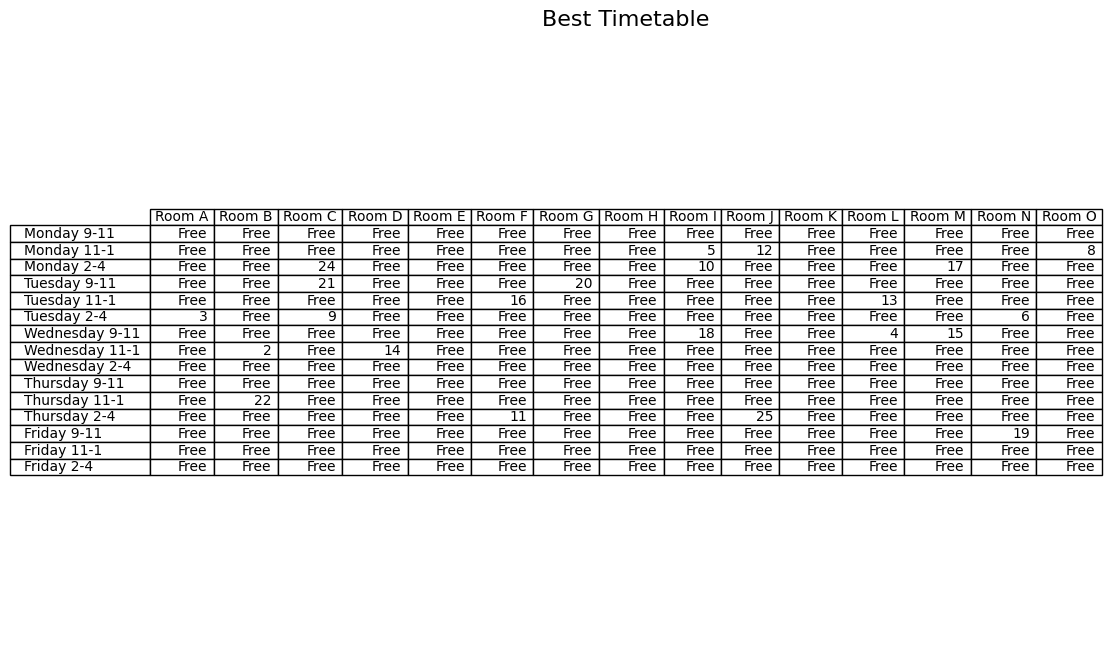

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# === Visualization function ===
def visualize_timetable(population, rooms_data, timeslots_data, fitness_func):
    best_individual = max(population, key=lambda ind: fitness_func(ind, rooms_data))
    
    # Create a blank grid for the timetable
    timetable = np.full((len(timeslots_data), len(rooms_data)), '', dtype=object)
    
    # Map exam slots to timeslot and room
    for exam in best_individual:
        timeslot_index = next(i for i, ts in enumerate(timeslots_data) if ts['timeslot_id'] == exam['timeslot_id'])
        room_index = next(i for i, room in enumerate(rooms_data) if room['id'] == exam['room_id'])
        
        # Fill in the timetable grid with course name
        timetable[timeslot_index, room_index] = exam['course_id']  # You can replace 'course_id' with course name if available
    
    # Plotting the timetable
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.axis('tight')
    ax.axis('off')
    
    # Display the grid with the timeslot and room labels
    table_data = []
    for row in timetable:
        table_data.append([cell if cell != '' else 'Free' for cell in row])  # 'Free' for empty slots
    
    table = ax.table(cellText=table_data, 
                    colLabels=[room['id'] for room in rooms_data],
                    rowLabels=[ts['day'] + " " + ts['time'] for ts in timeslots_data], 
                    loc='center')
    
    # Improve table appearance
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(rooms_data))))
    
    # Add a title
    ax.set_title('Best Timetable', fontsize=16)

    # Show the plot
    plt.show()

# Example: Visualize the best timetable from the evolved population
visualize_timetable(evolved_population, rooms, timeslots, fitness_function)


Generation 1
Best fitness: 0.000281610813855252
Average fitness: 0.0002816108138552521
Generation 2
Best fitness: 0.000279876854184159
Average fitness: 0.0002798768541841589
Generation 3
Best fitness: 0.000279876854184159
Average fitness: 0.0002798768541841589
Generation 4
Best fitness: 0.00027793218454697053
Average fitness: 0.0002779321845469705
Generation 5
Best fitness: 0.00027793218454697053
Average fitness: 0.0002779321845469705
Generation 6
Best fitness: 0.000279876854184159
Average fitness: 0.0002798768541841589
Generation 7
Best fitness: 0.000279876854184159
Average fitness: 0.0002798768541841589
Generation 8
Best fitness: 0.000279876854184159
Average fitness: 0.0002798768541841589
Generation 9
Best fitness: 0.0002765486725663717
Average fitness: 0.0002765486725663717
Generation 10
Best fitness: 0.0002801905295601009
Average fitness: 0.00028019052956010094


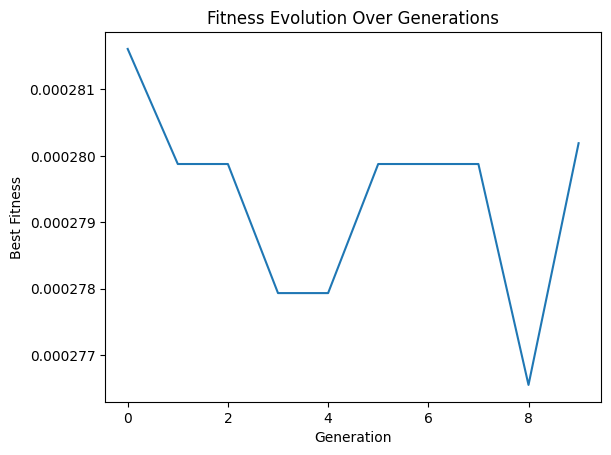

In [33]:
import matplotlib.pyplot as plt

# Define tournament size (this should be a positive integer)
tournament_size = 3  # You can adjust this value as needed

# Track fitness evolution
fitness_history = []

for generation in range(generations):
    print(f"Generation {generation + 1}")

    # Evaluate fitness for the current population
    fitness_scores = [fitness_function(individual, rooms) for individual in population]
    
    # Store best fitness
    best_fitness = max(fitness_scores)
    fitness_history.append(best_fitness)
    
    # Store average fitness for analysis (optional)
    avg_fitness = sum(fitness_scores) / len(fitness_scores)

    # Print fitness for debugging
    print(f"Best fitness: {best_fitness}")
    print(f"Average fitness: {avg_fitness}")
    
    # Selection, crossover, and mutation (evolve population)
    next_generation = []
    
    while len(next_generation) < len(population):
        # Select parents using tournament selection
        parent1 = tournament_selection(population, fitness_function, rooms, k=tournament_size)
        parent2 = tournament_selection(population, fitness_function, rooms, k=tournament_size)
        
        # Apply crossover
        offspring1, offspring2 = crossover(parent1, parent2)
        
        # Apply mutation
        mutated_offspring1 = mutate(offspring1, rooms, timeslots, mutation_rate=0.1)
        mutated_offspring2 = mutate(offspring2, rooms, timeslots, mutation_rate=0.1)
        
        # Add the mutated offspring to the next generation
        next_generation.append(mutated_offspring1)
        next_generation.append(mutated_offspring2)
    
    # Ensure the next generation has the same size as the population
    population = next_generation[:len(population)]

# Plot fitness history
plt.plot(fitness_history)
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Fitness Evolution Over Generations')
plt.show()
